Bank Customers Churn Exploratory Data Analysis.


Objectives;

1. This Exploratory Data Analysis (EDA) aims to explore possible factors that may lead to bank customers leaving.

2. In this context, "churn" refers to customers who have made the decision to close their accounts or stop using the bank's services.

Questions & Hypothesis

1. Does different card type have an influence on churned rates?

Hypothesis: Yes, as typically banks tend to offer better products and services for those in a higher tier

2. Is the churned rates higher with lower tier cards?

Hypothesis: Yes, it would make sense for banks to maintain their higher tier card members but not by a huge margin

3. Poor complaints handling can leave to higher churned rates, is that the case in this data set?

Hypothesis: Yes, rationally if a customer is not happy with their services, they would transfer over to another bank that best satisfies their needs.

4. Do bank customers develop a higher churn rate on the long run with the bank?

Hypothesis: No, if a bank customer is satisfied with their services they would continue banking at their current bank.



Importing the Necessary Libraries

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing CSV File

In [7]:
bank_df = pd.read_csv('Customer-Churn-Records.csv')

In [8]:
bank_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Checking the Data Information

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Checking Null Counts

In [11]:
bank_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Checking for Duplicated Value Counts

In [12]:
bank_df.duplicated().sum()

0

Data Transformation

For a clearer data visualization later on, apply label encoding to the column 'Existed' where values 1 & 0 are churned and retained respectively.

In [13]:
bank_df['Exited_Label'] = bank_df['Exited'].replace({1:'Churned', 0:'Retained'})

In [14]:
bank_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Exited_Label
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Churned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Retained
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Churned
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Retained
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Retained
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Churned
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206,Retained
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,Churned
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251,Retained
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342,Retained


Data Visualization

Checking for Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'RowNumber'),
  Text(2, 0, 'CustomerId'),
  Text(3, 0, 'CreditScore'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'Tenure'),
  Text(6, 0, 'Balance'),
  Text(7, 0, 'NumOfProducts'),
  Text(8, 0, 'HasCrCard'),
  Text(9, 0, 'IsActiveMember'),
  Text(10, 0, 'EstimatedSalary'),
  Text(11, 0, 'Exited'),
  Text(12, 0, 'Complain'),
  Text(13, 0, 'Satisfaction Score'),
  Text(14, 0, 'Point Earned')])

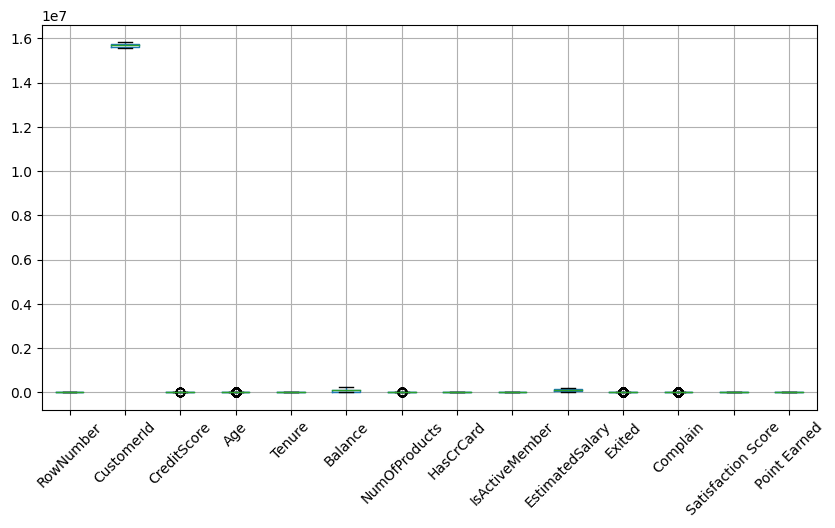

In [15]:
bank_df.boxplot(figsize=(10,5))
plt.xticks(rotation=45)

The box plot demonstrates that there are no data points outside the whiskers, indicating the absence of outliers.


Creating a Pie-Chart Showing the Ratio of Churned and Retained Clients in this Bank

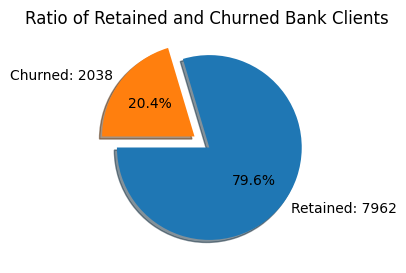

In [16]:
fig = plt.figure(figsize=(3,3))
data = bank_df['Exited_Label'].value_counts()
plt.pie(data,
labels=[f'{data.index[0]}: {data.values[0]}',
f'{data.index[1]}: {data.values[1]}'],
autopct='%1.1f%%', shadow=True, explode=[0,0.2], startangle=180)
plt.title('Ratio of Retained and Churned Bank Clients ')
plt.show()

There are nearly 4 times more retained clients to churned clients represented in this data

Retention by Card type

Check the different card types and total sum of clients per card type

In [17]:
bank_df['Card Type'].value_counts().sort_values()

PLATINUM    2495
SILVER      2496
GOLD        2502
DIAMOND     2507
Name: Card Type, dtype: int64

Each card type have similar amount of customers.

Checking the Amount of Bank Customers Churned and Retained based on Card Type.

In [18]:
bank_df.groupby(['Card Type', 'Exited_Label']).size().unstack(fill_value=0)

Exited_Label,Churned,Retained
Card Type,,
DIAMOND,546,1961
GOLD,482,2020
PLATINUM,508,1987
SILVER,502,1994


The Diamond card users have the higest rate of churned customers while the Gold card users have the highest retained customers.


Visualization Showing the Distribution of Retained and Churned Clients for each Card Type.

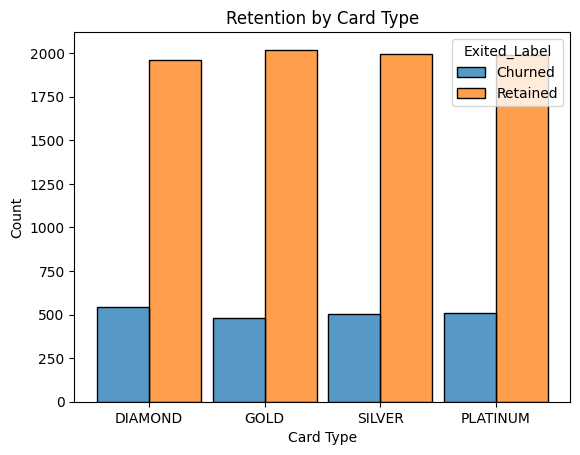

In [19]:
sns.histplot(data=bank_df, x='Card Type', hue='Exited_Label', multiple='dodge', shrink= 0.9
)
plt.title('Retention by Card Type');

Finding the Percentage of the Churned Card Users

In [20]:
churned_percentage = bank_df.groupby(['Card Type', 'Exited_Label']).size().unstack(fill_value=0) 

def exited_percentages(x):
    total = x.sum()
    exited_count = x['Churned']
    exited_percentage = (exited_count/total) * 100
    return exited_percentage

churned_percentage['Exited_percentage'] = churned_percentage.apply(exited_percentages, axis = 1)
churned_percentage['Exited_percentage'] = churned_percentage['Exited_percentage'].round()
print(churned_percentage)

Exited_Label  Churned  Retained  Exited_percentage
Card Type                                         
DIAMOND           546      1961               22.0
GOLD              482      2020               19.0
PLATINUM          508      1987               20.0
SILVER            502      1994               20.0


The percentage of those who churned is around 20% with Diamond Card users churning at a bit higher rate of 22%

To check the Complain rate per Card Type

<AxesSubplot:title={'center':'Complains per Card Type'}, ylabel='Card Type'>

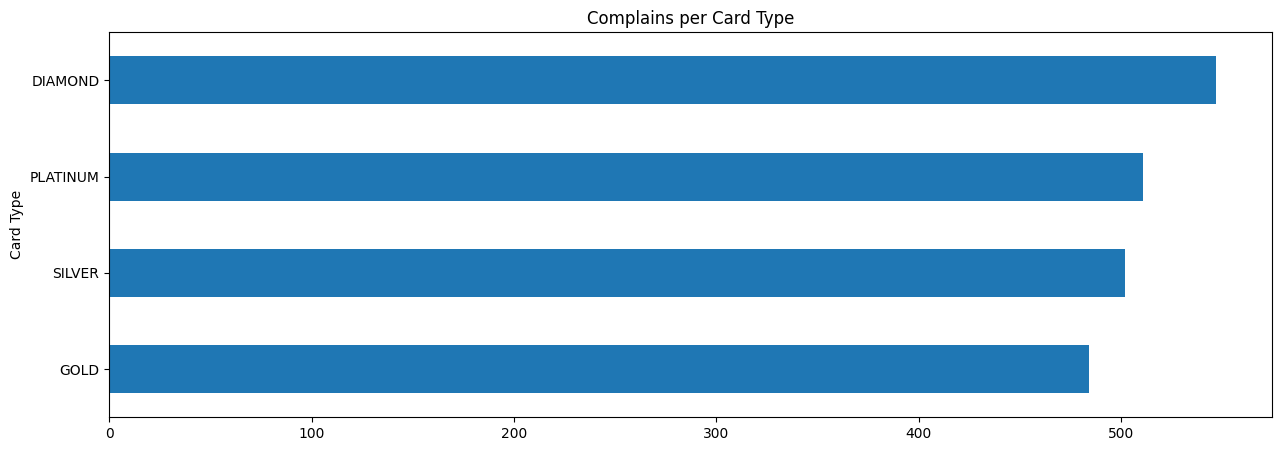

In [21]:
bank_df.groupby('Card Type')['Complain'].sum().sort_values() \
    .plot(kind='barh', figsize=(15,5), title='Complains per Card Type')

The Diamond card type has more complaints compared to the other three card types

To Check the balance of each card type

In [22]:
bank_df.groupby('Card Type')['Balance'].sum() \
    .apply(lambda x: "{:,.0f}".format(x))

Card Type
DIAMOND     198,353,883
GOLD        191,891,796
PLATINUM    188,853,306
SILVER      185,759,909
Name: Balance, dtype: object

The balance between card types ranges from 185.8M to 198.4M with Diamond card type holders having the highest total balance.


To Check the Number of Complains by Satisfaction 

Text(0.5, 0, 'Number of Complains')

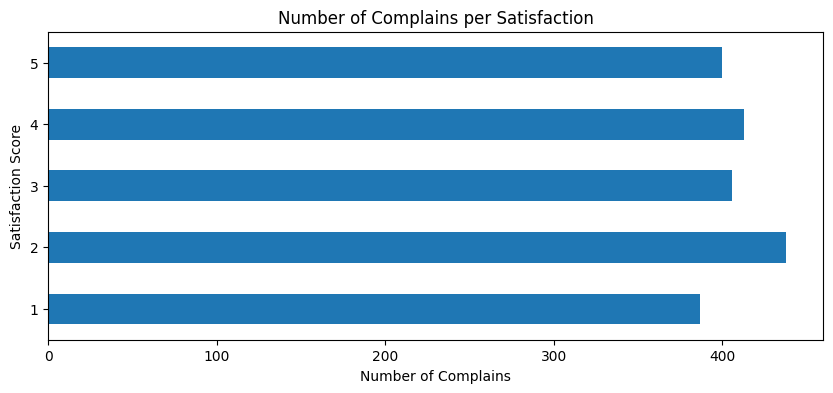

In [23]:
bank_df.groupby('Satisfaction Score')['Complain'].sum() \
    .sort_index(ascending=True) \
        .plot(kind = 'barh', figsize =(10,4), title='Number of Complains per Satisfaction')
plt.xlabel('Number of Complains')


The number of complains vs the satisfaction score of the complaint seems to consistent with score of 2 having the most complaints.

This is not ideal as banks would ideally have more 4 - 5 scores in complaints handling as poor customer satisfaction can lead to customer leaving the bank.


Finding the Average Age of each Card Users

In [24]:
bank_df.groupby('Card Type')['Age'].mean().round()

Card Type
DIAMOND     39.0
GOLD        39.0
PLATINUM    39.0
SILVER      39.0
Name: Age, dtype: float64

Average age of card users for each card types is around 39 years old.

Finding the Churned Rate by Tenure

In [25]:
tenure_percent= bank_df.groupby(['Tenure', 'Exited_Label']).size().unstack(fill_value=0)

In [26]:
# Applying the function 'exited_percentages' to tenured_percent to find the percentage of churned per tenure

tenure_percent['churned_percentages'] = tenure_percent.apply(exited_percentages, axis = 1)
tenure_percent['churned_percentages']= tenure_percent['churned_percentages'].round(2)
print(tenure_percent)

Exited_Label  Churned  Retained  churned_percentages
Tenure                                              
0                  95       318                23.00
1                 232       803                22.42
2                 201       847                19.18
3                 213       796                21.11
4                 203       786                20.53
5                 209       803                20.65
6                 196       771                20.27
7                 177       851                17.22
8                 197       828                19.22
9                 214       770                21.75
10                101       389                20.61


Visualization Showing the Percentage of Churned Customers over Tenure

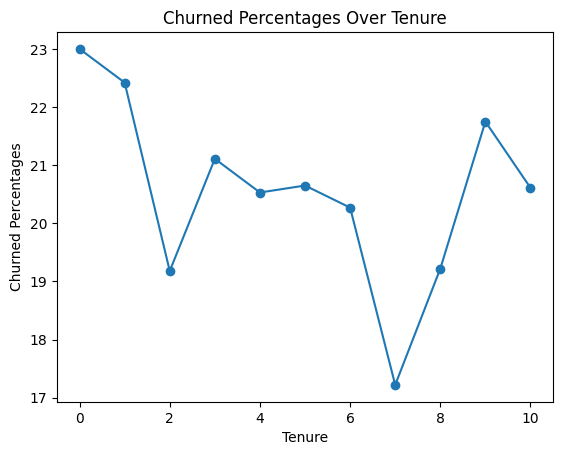

In [27]:
# Plotting a Time Series to show tenure years compared to percentage of those who churned.

plt.plot(tenure_percent.index, tenure_percent['churned_percentages'], marker='o', linestyle='-')
plt.xlabel('Tenure')
plt.ylabel('Churned Percentages')
plt.title('Churned Percentages Over Tenure')
plt.grid(False)
plt.show()

The line graph shows the highest churn rate within the first year and the lowest churn rate around 7 years of tenure.

Visualization showing the Churned and Retained customers over Tenure

Text(0, 0.5, 'Tenure Count')

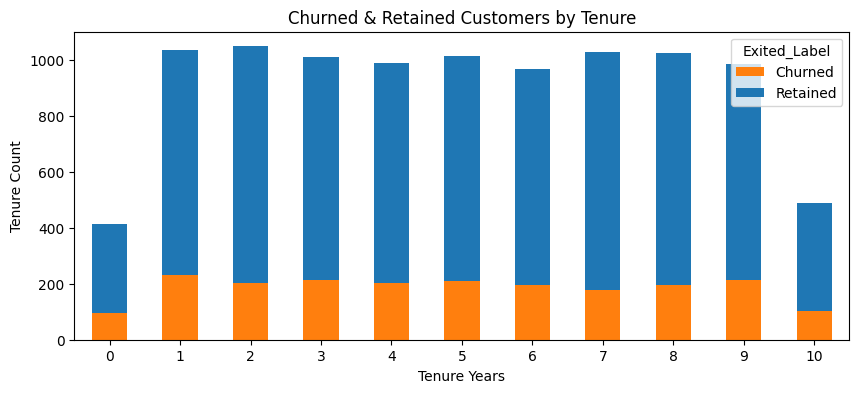

In [28]:
tenure_counts = bank_df.groupby(['Tenure', 'Exited_Label']).size().unstack(fill_value=0)
tenure_counts.plot(kind = 'bar', stacked=True, figsize=(10,4), title = 'Churned & Retained Customers by Tenure', 
                   color=['#ff7f0e','#1f77b4'])
plt.xticks(rotation=0)
plt.xlabel('Tenure Years')
plt.ylabel('Tenure Count')

During tenure years 1 to 9, there is a consistent number of customers, and the churned amounts are also quite similar.


Checking the Number of Bank Customers Churned and Retained based on Gender.

In [29]:
bank_df.groupby(['Gender', 'Exited_Label']).size().unstack(fill_value=0)

Exited_Label,Churned,Retained
Gender,,
Female,1139,3404
Male,899,4558


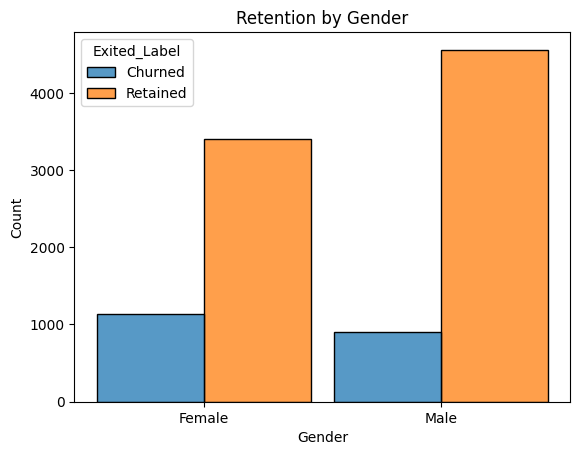

In [30]:
sns.histplot(data=bank_df, x='Gender', hue='Exited_Label', multiple='dodge', shrink= 0.9
)
plt.title('Retention by Gender');

This shows that most of the customers churned are females.

Checking the Number of Bank Customers Churned and Retained based on Geography

In [31]:
bank_df.groupby(['Geography', 'Exited_Label']).size().unstack(fill_value=0)

Exited_Label,Churned,Retained
Geography,,
France,811,4203
Germany,814,1695
Spain,413,2064


Text(0.5, 1.0, 'Rentention by Geography')

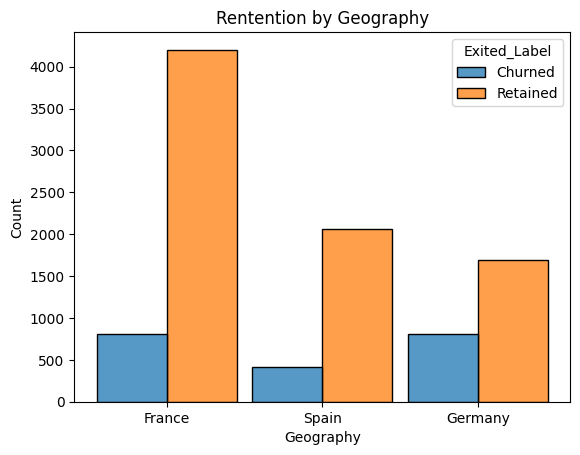

In [32]:
sns.histplot(data=bank_df, x='Geography', hue='Exited_Label', multiple='dodge', shrink=0.9)
plt.title('Rentention by Geography')

Majority of the churned customers are from Germany

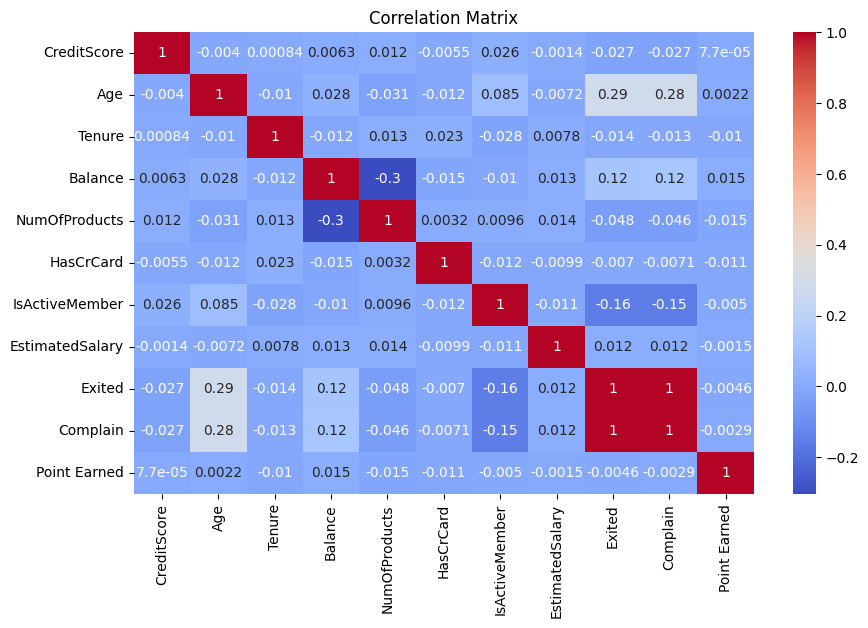

In [33]:
# Select only the numerical features for correlation matrix
numerical_features = bank_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited','Complain','Point Earned']]

# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize =(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This correlation matrix shows that there is'nt a very good correlation between features

Finding: The correlation analysis reveals that there is no strong linear relationship between the features examined.

Cause: The absence of strong correlations suggests that customer churn may be influenced by a combination of multiple factors rather than a single dominant factor.



In [34]:
bank_df.groupby(['IsActiveMember', 'Exited_Label']).size().unstack(fill_value=0)

Exited_Label,Churned,Retained
IsActiveMember,,
0,1303,3546
1,735,4416


In [37]:
# Calculate churn rate by age and gender
churn_rate_age_gender = bank_df.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()


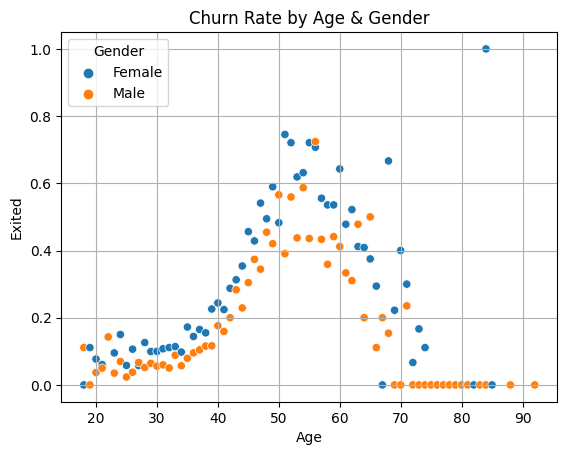

In [50]:
# Create an interactive scatter plot
sns.scatterplot(data=churn_rate_age_gender, x='Age', y='Exited', hue='Gender').set(title='Churn Rate by Age & Gender')
plt.grid(True)
plt.show()

From the scatter plot, it can be seen that;

1. Customers between the age of 50 - 70 have higher tendency to leave the bank.

2. Female has higher churn rate than male.

Cause:

1. Older customers may be more likely to consider switching banks due to life changes, retirement, or seeking better financial products and services.

2. The higher churn rate among female customers could be influenced by various factors such as customer satisfaction, service quality, targeted marketing strategies,etc.




Findings:

1. Does different card type have an influence on churned rates?
From the analysis, there tends to be a higher percentage of churned within the diamond card type

2. Is the churned rates higher with lower tier cards?
No, the churned rates was higher with diamond card type

3. Poor complaints handling can lead to higher churned rates, is that the case in this data set?
From the analysis, diamond card type had the highest amount of complaints as well as the highest percentage of churned

4. Do bank customers have a higher churned rate the longer they are in the bank?
From the analysis, bank customers churned at the highest percentage within the first year




Recommendations for the Bank:

1. Improve Customer Satisfaction: Conduct regular customer satisfaction surveys to identify pain points and areas for improvement. Addressing customer concerns promptly and effectively can help reduce churn rates.

2. Enhance Customer Retention Programs: Develop loyalty programs, personalized offers, and rewards to incentivize customers to stay with the bank. Building strong relationships and providing value-added services can increase customer loyalty.

3. Focus on Retaining Female Customers: Analyze the reasons behind the higher churn rate among female customers. Tailor marketing and customer service strategies to meet their specific needs and preferences.

4. Strengthen Communication Channels: Ensure effective communication channels are in place to keep customers informed about new products, services, and updates. Regularly engage with customers through personalized interactions and provide timely support.

5. Offer Targeted Financial Solutions: Analyze the needs and preferences of customers within the age group of 50-70. Provide tailored financial solutions, such as retirement planning, investment options, and specialized services, to meet their unique requirements.

6. Provide Value-added Products and Services: Continuously assess the market to identify emerging trends and offer innovative products and services that differentiate the bank from competitors. Regularly review and update existing offerings to remain competitive.

7. Foster Trust and Transparency: Build trust and transparency through clear communication, fair pricing, and reliable services. Ensure customers feel valued and have confidence in the bank's integrity and commitment to their financial well-being.

8. Complaint Resolution: Improve the complaint resolution process by actively addressing customer complaints, providing prompt and satisfactory solutions, and enhancing customer support channels. This can help reduce churn rates associated with unresolved complaints.


Conclusion:
By implementing these recommendations, the bank can strengthen customer relationships, increase customer satisfaction, and ultimately reduce churn rates. Regular monitoring and analysis of customer behavior and feedback will help refine strategies and further improve customer retention efforts.